## Importando os Arquivos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

combustivel = pd.read_csv('DADOS_GASOLINA.tsv',delimiter='\t',encoding='utf-8')
car = pd.read_csv('DADOS_CARROS.csv', delimiter=';')
dol = pd.read_csv('DADOS_DOLAR.csv')

In [12]:
print(combustivel['PRODUTO'].unique())

['ETANOL HIDRATADO' 'GASOLINA COMUM' 'GLP' 'GNV' 'ÓLEO DIESEL'
 'ÓLEO DIESEL S10']


## Limpando os dados

### Carro

In [3]:
mes_carro = []
ano_carro = []

for x in car['data']:                 #Quebrando data em ano e mês para comparar com a outra tabela
    mes_carro.append(int(x[3:5]))     #Convertendo de string pra int
    ano_carro.append(int(x[6:10]))

carro = pd.DataFrame ({
    'Vendas': car['valor'],
    'Data': car['data'],              #Formatado como string
    'Mês': mes_carro,
    'Ano': ano_carro
})

carro = carro[(carro['Ano'] >= 2004)] #Filtrando os anos incluidos na tabela de combustível

### Dólar

In [4]:
ano_dolar = []
mes_dolar = []
cot_com = []
cot_ven = []

for y in dol['dataHoraCotacao']:
    ano_dolar.append(int(y[0:4]))
    mes_dolar.append(int(y[5:7]))

for w in dol['cotacaoCompra']:
    i = len(w) - 2
    w = w.split(',')
    w = int(w[0] + w[1])
    w = w / (10**i)
    cot_com.append(w)

for z in dol['cotacaoVenda']:
    i = len(z) - 2
    z = z.split(',')
    z = int(z[0] + z[1])
    z = z / (10**i)
    cot_ven.append(z)
    
dolar = pd.DataFrame ({
    'Cotação Compra': cot_com,
    'Cotação Venda': cot_ven,
    'Data': dol['dataHoraCotacao'],
    'Mês': mes_dolar,
    'Ano': ano_dolar
})

## Análise gasolina comum

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


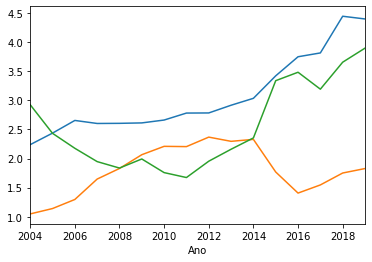

In [6]:
gasolina = combustivel[(combustivel['PRODUTO'] == 'GASOLINA COMUM')]

gasolina_br = gasolina.groupby('ANO')['PREÇO MÉDIO REVENDA'].mean()

dolar_ano = dolar.groupby('Ano')['Cotação Compra'].mean()

carro_ano = carro.groupby('Ano')['Vendas'].mean()/100000

print(gasolina_br.plot(), carro_ano.plot(), dolar_ano.plot())

## Prints da equipe

In [ ]:
print('Rafael')